In [1]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

df = pd.read_csv('Crimes_-_2001_to_Present.csv')

cbdf = pd.read_csv('chibulls_rawyearstats - sportsref_download.csv')

C:\Users\jackb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(df.shape)

(7165841, 22)


In [3]:
print(cbdf.shape)

(54, 19)


In [4]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.00,45.00,11,nan,nan,2001,08/05/2017 03:50:08 PM,nan,nan,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.00,73.00,02,nan,nan,2017,02/11/2018 03:57:41 PM,nan,nan,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.00,70.00,05,nan,nan,2017,02/11/2018 03:57:41 PM,nan,nan,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.00,42.00,06,nan,nan,2017,02/11/2018 03:57:41 PM,nan,nan,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.00,32.00,02,nan,nan,2017,02/11/2018 03:57:41 PM,nan,nan,NaN


# Yearly Crimes Exploration

In [71]:
crime_series = df.groupby(["Year"]).size()
crime_df = crime_series.to_frame()
crime_df_transposed = crime_df[:19].transpose()
crime_df_transposed
crime_df[:19].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,19.00,"370,948.00","87,547.87","259,640.00","272,448.50","370,393.00","450,933.50","486,762.00"


The cell above makes an aggregation of cases per year in chronological order.

In [7]:
df["Year"].value_counts()

2002    486762
2001    485779
2003    475960
2004    469395
2005    453731
2006    448136
2007    437039
2008    427095
2009    392762
2010    370393
2011    351870
2012    336124
2013    307271
2014    275517
2016    269380
2017    268621
2018    268115
2015    264422
2019    259640
2020    117829
Name: Year, dtype: int64

This cell above sorts the number of cases per year in descending order so the data is not in chronological order anymore.

In [8]:
df["Year"].min()

2001

This is to be expected since the minimum value in the Year column would be 2001.

In [9]:
df["Year"].max()

2020

This is also to be expected since the maximum value in the Year column would be 2020.

In [10]:
df["Year"].count()

7165841

This is to be expected since this value matches the 7165841 you get when you do print(df.shape).

In [11]:
df.groupby(["Year"]).count()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location
Year,,,,,,,,,,,,,,,,,,,,,
2001,485779,485779,485779,485779,485779,485779,485779,485775,485779,485779,...,485779,4189,6168,485779,482877,482877,485779,482877,482877,482877
2002,486762,486762,486762,486762,486762,486762,486762,486757,486762,486762,...,486762,353650,354123,486762,471528,471528,486762,471528,471528,471528
2003,475960,475960,475960,475960,475960,475960,475960,475956,475960,475960,...,475960,475941,475912,475960,472039,472039,475960,472039,472039,472039
2004,469395,469395,469395,469395,469395,469395,469395,469381,469395,469395,...,469393,469373,469329,469395,467200,467200,469395,467200,467200,467200
2005,453731,453731,453731,453731,453731,453731,453731,453717,453731,453731,...,453730,453730,453677,453731,449920,449920,453731,449920,449920,449920
2006,448136,448136,448136,448136,448136,448136,448136,448122,448136,448136,...,448135,448133,448087,448136,445547,445547,448136,445547,445547,445547
2007,437039,437039,437039,437039,437039,437039,437039,437026,437039,437039,...,437037,437034,436881,437039,435691,435691,437039,435691,435691,435691
2008,427095,427095,427095,427095,427095,427095,427095,427063,427095,427095,...,427055,427091,426852,427095,420028,420028,427095,420028,420028,420028
2009,392762,392760,392762,392762,392762,392762,392762,392718,392762,392762,...,392762,392759,392543,392762,386047,386047,392762,386047,386047,386047


This looks correct. Most fields have an entry and are aggregated to the total number of cases valid in that year.

# Looking at crimes where an arrest occurred

In [12]:
arrested_query = df.query("Arrest == True")
arrested_series = arrested_query.groupby(["Year"]).size()
arrested_df = arrested_series.to_frame()
arrested_df_transposed = arrested_df.transpose()
arrested_df_transposed

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,141910,141555,141577,144690,140902,135394,131862,109973,110784,100501,96256,90610,86489,79578,69970,52936,52546,53678,55355,19543


In [72]:
arrested_df[:19].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,19.00,"101,924.53","34,564.79","52,546.00","74,774.00","100,501.00","138,148.00","144,690.00"


### Now we want to see the % of crimes where arrests occurred...

In [14]:
df_merged = crime_df.merge(arrested_df, on="Year")
df_merged = df_merged.rename(columns = { "0_x" : "Total Crimes", "0_y" : "Total Arrests" })
df_merged

,Total Crimes,Total Arrests
Year,,
2001,485779,141910
2002,486762,141555
2003,475960,141577
2004,469395,144690
2005,453731,140902
2006,448136,135394
2007,437039,131862
2008,427095,109973
2009,392762,110784


In [15]:
df_merged["% of Crimes Resulting in Arrests"] = df_merged["Total Arrests"].divide(df_merged["Total Crimes"])
df_merged


,Total Crimes,Total Arrests,% of Crimes Resulting in Arrests
Year,,,
2001,485779,141910,0.29
2002,486762,141555,0.29
2003,475960,141577,0.30
2004,469395,144690,0.31
2005,453731,140902,0.31
2006,448136,135394,0.30
2007,437039,131862,0.30
2008,427095,109973,0.26
2009,392762,110784,0.28


In [95]:
dfstats = df_merged[:19].describe()
dfstats[['% of Crimes Resulting in Arrests']].transpose()

,count,mean,std,min,25%,50%,75%,max
% of Crimes Resulting in Arrests,19.00,0.27,0.04,0.20,0.26,0.28,0.29,0.31


### Investing how crimes are categorized

In [113]:
df_type = df.groupby(["Primary Type"]).count()
df_type

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,11899,11899,11899,11899,11899,11899,11898,11899,11899,11899,...,10584,10583,11899,11820,11820,11899,11899,11820,11820,11820
ASSAULT,452049,452048,452049,452049,452049,452049,452047,452049,452049,452049,...,412244,412229,452049,450107,450107,452049,452049,450107,450107,450107
BATTERY,1312302,1312301,1312302,1312302,1312302,1312302,1312298,1312302,1312302,1312302,...,1193937,1193880,1312302,1306694,1306694,1312302,1312302,1306694,1306694,1306694
BURGLARY,404336,404335,404336,404336,404336,404336,404329,404336,404336,404336,...,371858,371776,404336,402818,402818,404336,404336,402818,402818,402818
CONCEALED CARRY LICENSE VIOLATION,603,603,603,603,603,603,603,603,603,603,...,603,603,603,601,601,603,603,601,601,601
CRIM SEXUAL ASSAULT,28341,28341,28341,28341,28341,28341,28340,28341,28341,28341,...,26277,26271,28341,26818,26818,28341,28341,26818,26818,26818
CRIMINAL DAMAGE,815997,815996,815997,815997,815997,815997,815992,815997,815997,815997,...,744431,744477,815997,812145,812145,815997,815997,812145,812145,812145
CRIMINAL SEXUAL ASSAULT,1599,1599,1599,1599,1599,1599,1598,1599,1599,1599,...,1588,1588,1599,1440,1440,1599,1599,1440,1440,1440
CRIMINAL TRESPASS,203625,203625,203625,203625,203625,203625,203624,203625,203625,203625,...,186123,186390,203625,202652,202652,203625,203625,202652,202652,202652


# Chicago Bulls Data

In [21]:
project_df = cbdf[:20]

In [22]:
project_df.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Unnamed: 8,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Unnamed: 15,Playoffs,Coaches,Top WS
0,2019-20,NBA,Chicago Bulls,22,43,0.34,3rd of 5,-3.85,nan,99.70,-0.60,106.70,-3.80,109.80,-0.70,nan,NaN,J. Boylen (22-43),Z. LaVine (4.0)
1,2018-19,NBA,Chicago Bulls,22,60,0.27,4th of 5,-8.32,nan,99.00,-1.00,104.80,-5.60,113.20,2.80,nan,NaN,"F. Hoiberg (5-19), J. Boylen (17-41)",R. Arcidiacono (3.7)
2,2017-18,NBA,Chicago Bulls,27,55,0.33,5th of 5,-6.84,nan,98.30,1.00,103.80,-4.80,110.90,2.30,nan,NaN,F. Hoiberg (27-55),B. Portis (3.5)
3,2016-17,NBA,Chicago Bulls*,41,41,0.50,4th of 5,0.03,nan,95.30,-1.10,107.40,-1.40,107.00,-1.80,nan,Lost E. Conf. 1st Rnd.,F. Hoiberg (41-41),J. Butler (13.8)
4,2015-16,NBA,Chicago Bulls,42,40,0.51,4th of 5,-1.46,nan,95.70,-0.10,105.00,-1.40,106.50,0.10,nan,NaN,F. Hoiberg (42-40),J. Butler (9.1)


In [23]:
project_df.columns

Index(['Season', 'Lg', 'Team', 'W', 'L', 'W/L%', 'Finish', 'SRS', 'Unnamed: 8',
       'Pace', 'Rel Pace', 'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg',
       'Unnamed: 15', 'Playoffs', 'Coaches', 'Top WS'],
      dtype='object')

# W/L% Exploration

In [24]:
df_wl = project_df["W/L%"]


In [25]:
project_df["W/L%"].value_counts()

0.50    4
0.33    1
0.34    1
0.28    1
0.26    1
0.18    1
0.76    1
0.61    1
0.76    1
0.57    1
0.55    1
0.58    1
0.40    1
0.37    1
0.60    1
0.51    1
0.27    1
Name: W/L%, dtype: int64

In [26]:
project_df["W/L%"].value_counts

<bound method IndexOpsMixin.value_counts of 0    0.34
1    0.27
2    0.33
3    0.50
4    0.51
5    0.61
6    0.58
7    0.55
8    0.76
9    0.76
10   0.50
11   0.50
12   0.40
13   0.60
14   0.50
15   0.57
16   0.28
17   0.37
18   0.26
19   0.18
Name: W/L%, dtype: float64>

In [27]:
project_df["W/L%"].max()

0.758

In [28]:
project_df["W/L%"].min()

0.183

In [29]:
project_df.groupby(["W/L%"]).size()

W/L%
0.18    1
0.26    1
0.27    1
0.28    1
0.33    1
0.34    1
0.37    1
0.40    1
0.50    4
0.51    1
0.55    1
0.57    1
0.58    1
0.60    1
0.61    1
0.76    1
0.76    1
dtype: int64

In [30]:
project_df["W/L%"].describe()

count   20.00
mean     0.47
std      0.16
min      0.18
25%      0.34
50%      0.50
75%      0.58
max      0.76
Name: W/L%, dtype: float64

# Playoff Exploration

In [31]:
project_df["Playoffs"].value_counts()

Lost E. Conf. 1st Rnd.    7
Lost E. Conf. Semis       3
Lost E. Conf. Finals      1
Name: Playoffs, dtype: int64

In [32]:
project_df["Playoffs"].value_counts

<bound method IndexOpsMixin.value_counts of 0                        NaN
1                        NaN
2                        NaN
3     Lost E. Conf. 1st Rnd.
4                        NaN
5        Lost E. Conf. Semis
6     Lost E. Conf. 1st Rnd.
7        Lost E. Conf. Semis
8     Lost E. Conf. 1st Rnd.
9       Lost E. Conf. Finals
10    Lost E. Conf. 1st Rnd.
11    Lost E. Conf. 1st Rnd.
12                       NaN
13       Lost E. Conf. Semis
14    Lost E. Conf. 1st Rnd.
15    Lost E. Conf. 1st Rnd.
16                       NaN
17                       NaN
18                       NaN
19                       NaN
Name: Playoffs, dtype: object>

In [33]:
project_df["Playoffs"].describe()

count                         11
unique                         3
top       Lost E. Conf. 1st Rnd.
freq                           7
Name: Playoffs, dtype: object

# Coaches Exploration

In [34]:
project_df["Coaches"].value_counts()

V. Del Negro (41-41)                                       2
T. Thibodeau (62-20)                                       1
T. Floyd (15-67)                                           1
T. Thibodeau (45-37)                                       1
F. Hoiberg (42-40)                                         1
T. Thibodeau (50-32)                                       1
T. Thibodeau (50-16)                                       1
S. Skiles (49-33)                                          1
T. Floyd (4-21), B. Berry (0-2), B. Cartwright (17-38)     1
J. Boylen (22-43)                                          1
B. Cartwright (30-52)                                      1
B. Cartwright (4-10), P. Myers (0-2), S. Skiles (19-47)    1
S. Skiles (9-16), P. Myers (0-1), J. Boylan (24-32)        1
F. Hoiberg (5-19), J. Boylen (17-41)                       1
T. Thibodeau (48-34)                                       1
S. Skiles (41-41)                                          1
F. Hoiberg (27-55)      

In [35]:
project_df["Coaches"].value_counts

<bound method IndexOpsMixin.value_counts of 0                                     J. Boylen (22-43)
1                  F. Hoiberg (5-19), J. Boylen (17-41)
2                                    F. Hoiberg (27-55)
3                                    F. Hoiberg (41-41)
4                                    F. Hoiberg (42-40)
5                                  T. Thibodeau (50-32)
6                                  T. Thibodeau (48-34)
7                                  T. Thibodeau (45-37)
8                                  T. Thibodeau (50-16)
9                                  T. Thibodeau (62-20)
10                                 V. Del Negro (41-41)
11                                 V. Del Negro (41-41)
12    S. Skiles (9-16), P. Myers (0-1), J. Boylan (2...
13                                    S. Skiles (49-33)
14                                    S. Skiles (41-41)
15                                    S. Skiles (47-35)
16    B. Cartwright (4-10), P. Myers (0-2), S. Skile...
17  

In [36]:
project_df["Coaches"].describe()

count                       20
unique                      19
top       V. Del Negro (41-41)
freq                         2
Name: Coaches, dtype: object

# Finish in Division Exploration

In [37]:
project_df["Finish"].value_counts()

2nd of 5    5
4th of 5    5
3rd of 5    3
8th of 8    3
1st of 5    2
5th of 5    1
6th of 8    1
Name: Finish, dtype: int64

In [38]:
project_df["Finish"].value_counts

<bound method IndexOpsMixin.value_counts of 0     3rd of 5
1     4th of 5
2     5th of 5
3     4th of 5
4     4th of 5
5     2nd of 5
6     2nd of 5
7     2nd of 5
8     1st of 5
9     1st of 5
10    3rd of 5
11    2nd of 5
12    4th of 5
13    3rd of 5
14    4th of 5
15    2nd of 5
16    8th of 8
17    6th of 8
18    8th of 8
19    8th of 8
Name: Finish, dtype: object>

In [39]:
project_df["Finish"].max()

'8th of 8'

The max function is interpreting the 8th of 8 as an integer so even though 8 is the max value, it's actually the inverse. The max value for this column is actually the min aka the worst finish.

In [40]:
project_df["Finish"].min()

'1st of 5'

The min function is interpreting the 1st of 5 as an integer so even though 1 is the min value, it's actually the inverse. The min value for this column is actually the max aka the best finish.

# Line Graph of Performance Over Time

Text(0, 0.5, 'Win/Loss %')

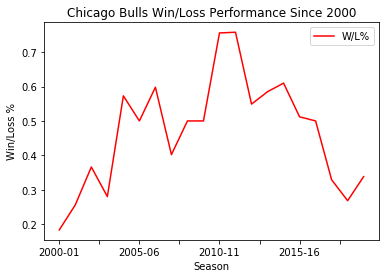

In [43]:
reversed_project_df = project_df.iloc[::-1]

reversed_project_df.plot.line(x="Season", y="W/L%", title = "Chicago Bulls Win/Loss Performance Since 2000", color = "red")
plt.xlabel("Season")
plt.ylabel("Win/Loss %")

Used .iloc[::-1] in order to reverse the order of the years data because originally it went from present to past and we need it to be past to present.

Text(0, 0.5, 'Win/Loss %')

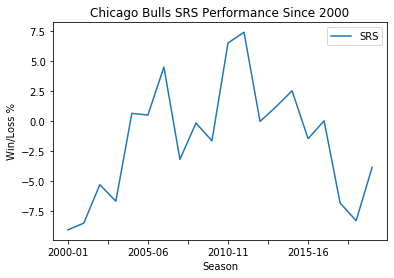

In [42]:
reversed_project_df.plot.line(x="Season", y="SRS", title = "Chicago Bulls SRS Performance Since 2000")
plt.xlabel("Season")
plt.ylabel("Win/Loss %")

In [47]:
project_df_winloss = project_df["W/L%"]
project_df_winloss = project_df_winloss.to_frame()
project_df_winloss = project_df_winloss.iloc[::-1]
winlosslist = project_df_winloss.values.tolist()
new_winlosslist = []
for x in winlosslist:
    for y in x:
        new_winlosslist.append(y)
print(new_winlosslist)

[0.183, 0.256, 0.366, 0.28, 0.573, 0.5, 0.598, 0.402, 0.5, 0.5, 0.7559999999999999, 0.758, 0.5489999999999999, 0.585, 0.61, 0.512, 0.5, 0.32899999999999996, 0.268, 0.33799999999999997]


In [48]:
project_df_SRS = project_df["SRS"]
project_df_SRS = project_df_SRS.to_frame()
project_df_SRS = project_df_SRS.iloc[::-1]
SRSlist = project_df_SRS.values.tolist()
new_SRSlist = []
for x in SRSlist:
    for y in x:
        new_SRSlist.append(y)
print(new_SRSlist)

[-9.09, -8.52, -5.31, -6.69, 0.65, 0.51, 4.52, -3.19, -0.16, -1.64, 6.53, 7.43, -0.02, 1.2, 2.54, -1.46, 0.03, -6.84, -8.32, -3.85]


### Create new column with new_winlosslist

In [55]:
df_merged["W/L%"] = new_winlosslist
df_merged['SRS'] = new_SRSlist
df_merged.rename(columns={None: 'Season'}, inplace=True)
df_merged

,Total Crimes,Total Arrests,% of Crimes Resulting in Arrests,W/L%,SRS
Year,,,,,
2001,485779,141910,0.29,0.18,-9.09
2002,486762,141555,0.29,0.26,-8.52
2003,475960,141577,0.30,0.37,-5.31
2004,469395,144690,0.31,0.28,-6.69
2005,453731,140902,0.31,0.57,0.65
2006,448136,135394,0.30,0.50,0.51
2007,437039,131862,0.30,0.60,4.52
2008,427095,109973,0.26,0.40,-3.19
2009,392762,110784,0.28,0.50,-0.16


In [96]:
df_merged.corr(method ='pearson')

,Total Crimes,Total Arrests,% of Crimes Resulting in Arrests,W/L%,SRS
Total Crimes,1.00,0.98,0.82,-0.18,-0.15
Total Arrests,0.98,1.00,0.90,-0.11,-0.08
% of Crimes Resulting in Arrests,0.82,0.90,1.00,0.17,0.17
W/L%,-0.18,-0.11,0.17,1.00,0.98
SRS,-0.15,-0.08,0.17,0.98,1.00


In [ ]:
df_merged.corr(method ='kendall')

In [ ]:
line graph by type of crime 
throw scatterplot in the report
look into unemployment as a counfounding variable

### Adding string Values of years to DF

In [83]:
df_merged['Year'] = ['2001','2002','2003','2004','2005','2006','2007','2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018', '2019', '2020']
df_merged

,Total Crimes,Total Arrests,% of Crimes Resulting in Arrests,W/L%,SRS,Year
Year,,,,,,
2001,485779,141910,0.29,0.18,-9.09,2001
2002,486762,141555,0.29,0.26,-8.52,2002
2003,475960,141577,0.30,0.37,-5.31,2003
2004,469395,144690,0.31,0.28,-6.69,2004
2005,453731,140902,0.31,0.57,0.65,2005
2006,448136,135394,0.30,0.50,0.51,2006
2007,437039,131862,0.30,0.60,4.52,2007
2008,427095,109973,0.26,0.40,-3.19,2008
2009,392762,110784,0.28,0.50,-0.16,2009


### Plot of Crime, Arrest and proportion changes

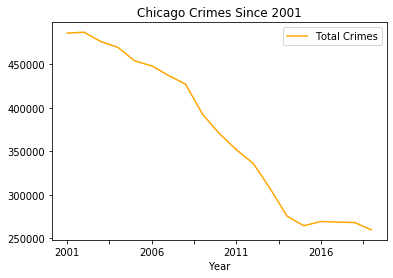

In [90]:
df_merged[:19].plot.line(x = "Year", y="Total Crimes", title = "Chicago Crimes Since 2001", color = 'orange')



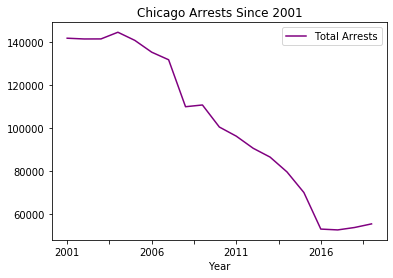

In [91]:
df_merged[:19].plot(x = 'Year', y="Total Arrests", title = "Chicago Arrests Since 2001", color = 'purple')



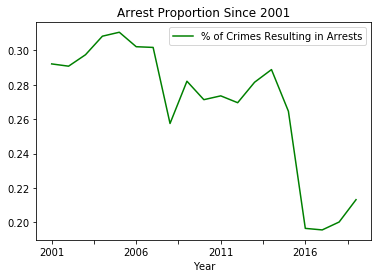

In [94]:
df_merged[:19].plot(x = "Year", y="% of Crimes Resulting in Arrests", title = "Arrest Proportion Since 2001", color = 'green')


### Scattterplot

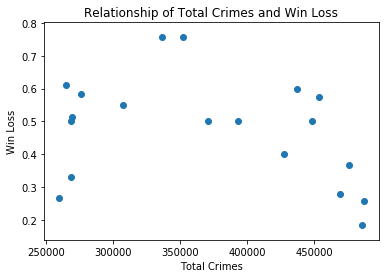

In [115]:
df_without2020 = df_merged[:19]
plt.scatter(df_without2020['Total Crimes'], df_without2020['W/L%'])
plt.title("Relationship of Total Crimes and Win Loss")
plt.xlabel("Total Crimes")
plt.ylabel("Win Loss")
plt.show()


